# 1. DATA MINING: Gather and load the data

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

df = pd.read_csv("The dataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [236]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')


# 

# 2. DATA CLEANING: Handle missing values and clean the data

In [237]:
#The dtypes are all object, it means that all of the columns in the DataFrame are stored as strings.
#This can be inefficient, as string data types use more memory and are slower to process than numeric data types.
# Change the data type of the 'Company Name' column from object to string
df['Company Name'] = df['Company Name'].astype(str)
df['Location'] = df['Location'].astype(str)
#without 'Datum'
df['Detail'] = df['Detail'].astype(str)
df['Status Rocket'] = df['Status Rocket'].astype(str)
df[' Rocket'] = df[' Rocket'].astype(str)
df['Status Mission'] = df['Status Mission'].astype(str)

In [238]:
#check the data types
print(df.dtypes)

Unnamed: 0.1       int64
Unnamed: 0         int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object


In [239]:
# Checking number of rows and columns 
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df.isnull().sum() * 100/df.shape[0]))

Number of Rows: 4324
Number of Columns: 9
*****Percentage of Null Values*****
Unnamed: 0.1      0.0
Unnamed: 0        0.0
Company Name      0.0
Location          0.0
Datum             0.0
Detail            0.0
Status Rocket     0.0
 Rocket           0.0
Status Mission    0.0
dtype: float64


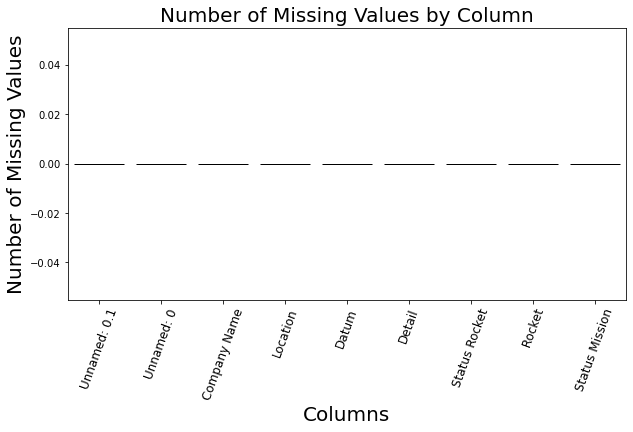

In [240]:
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black',x=df.columns, y=df.isnull().sum())
plt.title("Number of Missing Values by Column", fontsize=20)
plt.xlabel("Columns",fontsize=20)
plt.ylabel("Number of Missing Values", fontsize=20)
plt.xticks(rotation=70,fontsize=12)
plt.show()
#not showing any missing values anymore

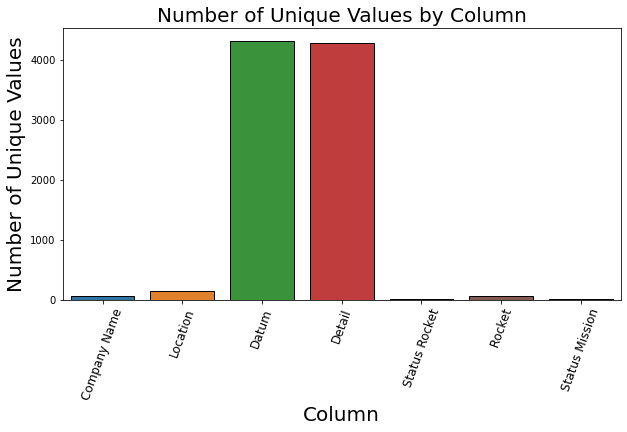

In [241]:
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black', x=df.select_dtypes('object').columns, y=df.select_dtypes('object').nunique())
plt.title("Number of Unique Values by Column", fontsize=20)
plt.xlabel("Column", fontsize=20)
plt.ylabel("Number of Unique Values",fontsize=20)
plt.xticks(rotation=70, fontsize=12)
plt.show()

In [242]:
#As shown above, there is only one column with null values, which is the column for mission cost.
#It is possible that some organizations do not disclose the cost of their missions.

In [243]:
#Converting the values in the 'Datum' column to datetime objects and stores them in the 'Launch date' column.
df['Launch date']=pd.to_datetime(df['Datum'])
#Converting the 'Launch date' column from a datetime object to a string.
df['Launch date']=df['Launch date'].astype(str)

In [244]:
#Splitting the 'Launch date' column on the space character and takes the first part of the resulting list.
df['Launch date']=df['Launch date'].str.split(' ',expand=True)[0]
#Converting the 'Launch date' column back to a datetime object.
df['Launch date']=pd.to_datetime(df['Launch date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Launch date
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,2020-08-04
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30


In [245]:
df['Launch date']=df['Launch date'].astype(str)

In [246]:
#For the visualisation and the model prediction we split the 'Launch date' with a new column with only the 'year'
#df['Year'] = df['Launch date'].str.split('-', expand=True)[0]

In [247]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission', 'Launch date'],
      dtype='object')


In [248]:
#Drop all the columns exept ''Company name' and 'Rocket' for the prediction model of the cost
df = df.drop(columns=[
    'Unnamed: 0.1', 'Unnamed: 0', 'Datum', ' Rocket'])
df

,Company Name,Location,Detail,Status Rocket,Status Mission,Launch date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,2020-08-07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,2020-08-06
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,2020-07-30
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,1958-02-05
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,1958-02-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,1957-12-06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,1957-11-03


In [249]:
# Checking number of rows and columns 
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df.isnull().sum() * 100/df.shape[0]))

Number of Rows: 4324
Number of Columns: 6
*****Percentage of Null Values*****
Company Name      0.0
Location          0.0
Detail            0.0
Status Rocket     0.0
Status Mission    0.0
Launch date       0.0
dtype: float64


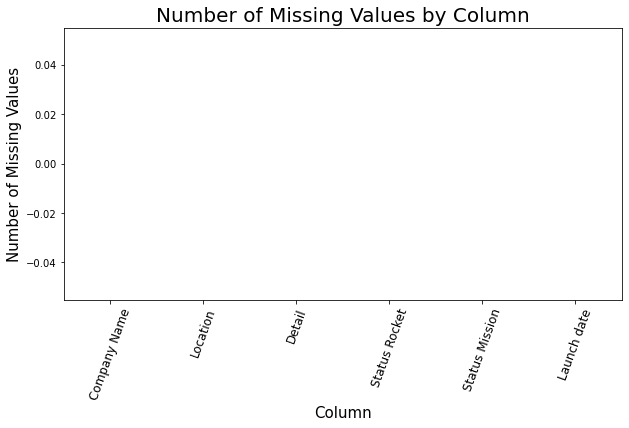

In [250]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.title("Number of Missing Values by Column",fontsize=20)
plt.xlabel("Column", fontsize=15)
plt.ylabel("Number of Missing Values",fontsize=15)
plt.xticks(rotation=70, fontsize=12)
plt.show()

In [251]:
# Check number of rows and columns
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 4324
Number of Columns: 6


# 3. FEATURE ENGINEERING: Select relevant features and create new ones as needed

# 

In [252]:
df = df[df['Detail'] != ""]

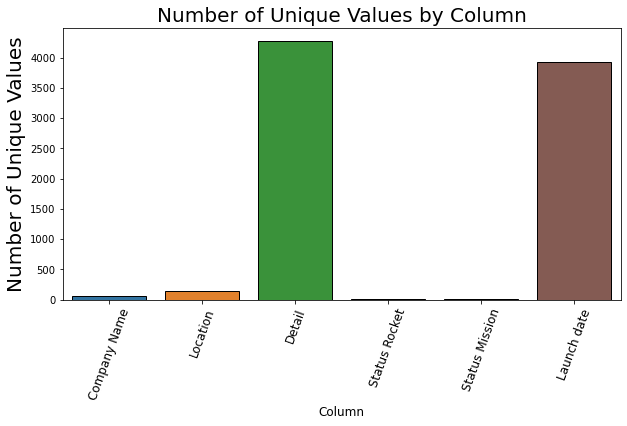

In [253]:
#From the features we need we check the unique values
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black',x=df.select_dtypes('object').columns, y=df.select_dtypes('object').nunique())
plt.title("Number of Unique Values by Column", fontsize=20)
plt.xlabel("Column",fontsize=12)
plt.ylabel("Number of Unique Values",fontsize=20)
plt.xticks(rotation=70, fontsize=12)
plt.show()

In [254]:
print(df['Company Name'].nunique())
print(df['Location'].nunique())
#Keep these columns they are
#It's okay to keep the columns as they are, even with these 56,57,137 numbers of unique values.
#The unique values are important for the analysis or prediction task.

56
137


In [255]:
#Spliting the 'Detail' column on the ' | ' character and store the resulting list in a new column, hoping the values go down
df['Spaceship_name'] = df['Detail'].str.split(' | ', expand=True)[0]

In [256]:
df.drop('Detail', axis=1, inplace=True)

In [257]:
df

,Company Name,Location,Status Rocket,Status Mission,Launch date,Spaceship_name
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",StatusActive,Success,2020-08-07,Falcon
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,Success,2020-08-06,Long
2,SpaceX,"Pad A, Boca Chica, Texas, USA",StatusActive,Success,2020-08-04,Starship
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",StatusActive,Success,2020-07-30,Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",StatusActive,Success,2020-07-30,Atlas
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",StatusRetired,Failure,1958-02-05,Vanguard
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",StatusRetired,Success,1958-02-01,Juno
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",StatusRetired,Failure,1957-12-06,Vanguard
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",StatusRetired,Success,1957-11-03,Sputnik


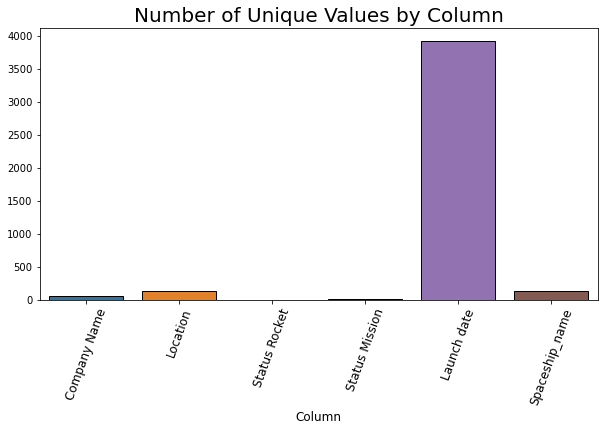

In [258]:
#Now we can see that we handled the unique AND the missing values good the this is the result
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black',x=df.select_dtypes('object').columns, y=df.select_dtypes('object').nunique())
plt.title("Number of Unique Values by Column", fontsize=20)
plt.xlabel("Column", fontsize=12)
#plt.ylabel("Number of Unique Values", fontsize=20)
plt.xticks(rotation=70, fontsize=12)
plt.show()

In [259]:
print(df['Company Name'].nunique())
print(df['Location'].nunique())
print(df['Launch date'].nunique())
print(df['Spaceship_name'].nunique())

56
137
3922
128


In [260]:
df['Launch date'].value_counts()[df['Launch date'].value_counts() > 1]

1990-08-28    4
1962-04-26    4
2018-07-09    3
2017-12-23    3
1989-02-14    3
             ..
1989-06-14    2
1976-04-28    2
2019-03-02    2
1972-03-01    2
1982-06-18    2
Name: Launch date, Length: 377, dtype: int64

In [261]:
df[['Launch date']]

,Launch date
0,2020-08-07
1,2020-08-06
2,2020-08-04
3,2020-07-30
4,2020-07-30
...,...
4319,1958-02-05
4320,1958-02-01
4321,1957-12-06
4322,1957-11-03


In [262]:
df['Launch date'] = df['Launch date'].astype(str)

In [263]:
#For the visualisation and the model prediction we split the 'Launch date' with a new column with only the 'year'
df['Year'] = df['Launch date'].str.split('-', expand=True)[0]

In [264]:
df

,Company Name,Location,Status Rocket,Status Mission,Launch date,Spaceship_name,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",StatusActive,Success,2020-08-07,Falcon,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,Success,2020-08-06,Long,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",StatusActive,Success,2020-08-04,Starship,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",StatusActive,Success,2020-07-30,Proton-M/Briz-M,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",StatusActive,Success,2020-07-30,Atlas,2020
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",StatusRetired,Failure,1958-02-05,Vanguard,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",StatusRetired,Success,1958-02-01,Juno,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",StatusRetired,Failure,1957-12-06,Vanguard,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",StatusRetired,Success,1957-11-03,Sputnik,1957


In [265]:
#For the visualisation in the future we split the Location with The country in 2 different columns
df = df.assign(Location=df['Location'].str.rsplit(',',1).str[0], Country=df['Location'].str.rsplit(',',1).str[1])

In [266]:
df

,Company Name,Location,Status Rocket,Status Mission,Launch date,Spaceship_name,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",StatusActive,Success,2020-08-07,Falcon,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,Success,2020-08-06,Long,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas",StatusActive,Success,2020-08-04,Starship,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",StatusActive,Success,2020-07-30,Proton-M/Briz-M,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",StatusActive,Success,2020-07-30,Atlas,2020,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",StatusRetired,Failure,1958-02-05,Vanguard,1958,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",StatusRetired,Success,1958-02-01,Juno,1958,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",StatusRetired,Failure,1957-12-06,Vanguard,1957,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",StatusRetired,Success,1957-11-03,Sputnik,1957,Kazakhstan


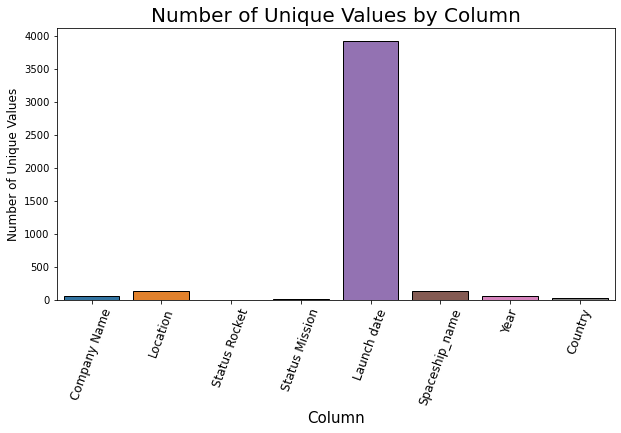

In [267]:
#Now we can see that we handled the unique AND the missing values good the this is the result
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black',x=df.select_dtypes('object').columns, y=df.select_dtypes('object').nunique())
plt.title("Number of Unique Values by Column", fontsize=20)
plt.xlabel("Column",fontsize=15)
plt.ylabel("Number of Unique Values", fontsize=12)
plt.xticks(rotation=70, fontsize=12)
plt.show()

# 

# 4.1 DATA VISUALISATION 
Understanding the trends and patterns in space launches over time

Objectives:

Identify the countries and rocket types that have the most launches
Determine the success rate of launches by year and by country
Identify any trends or patterns in the data that may be relevant to future space exploration efforts

In [298]:
# Identify the countries and rocket types that have the most launches
# Group the data by 'Location' and count the number of launches for each location
Country_counts = df['Country'].value_counts()
# Group the data by 'Rocket' and count the number of launches for each rocket type
#rocket_counts = df['Rocket'].value_counts()

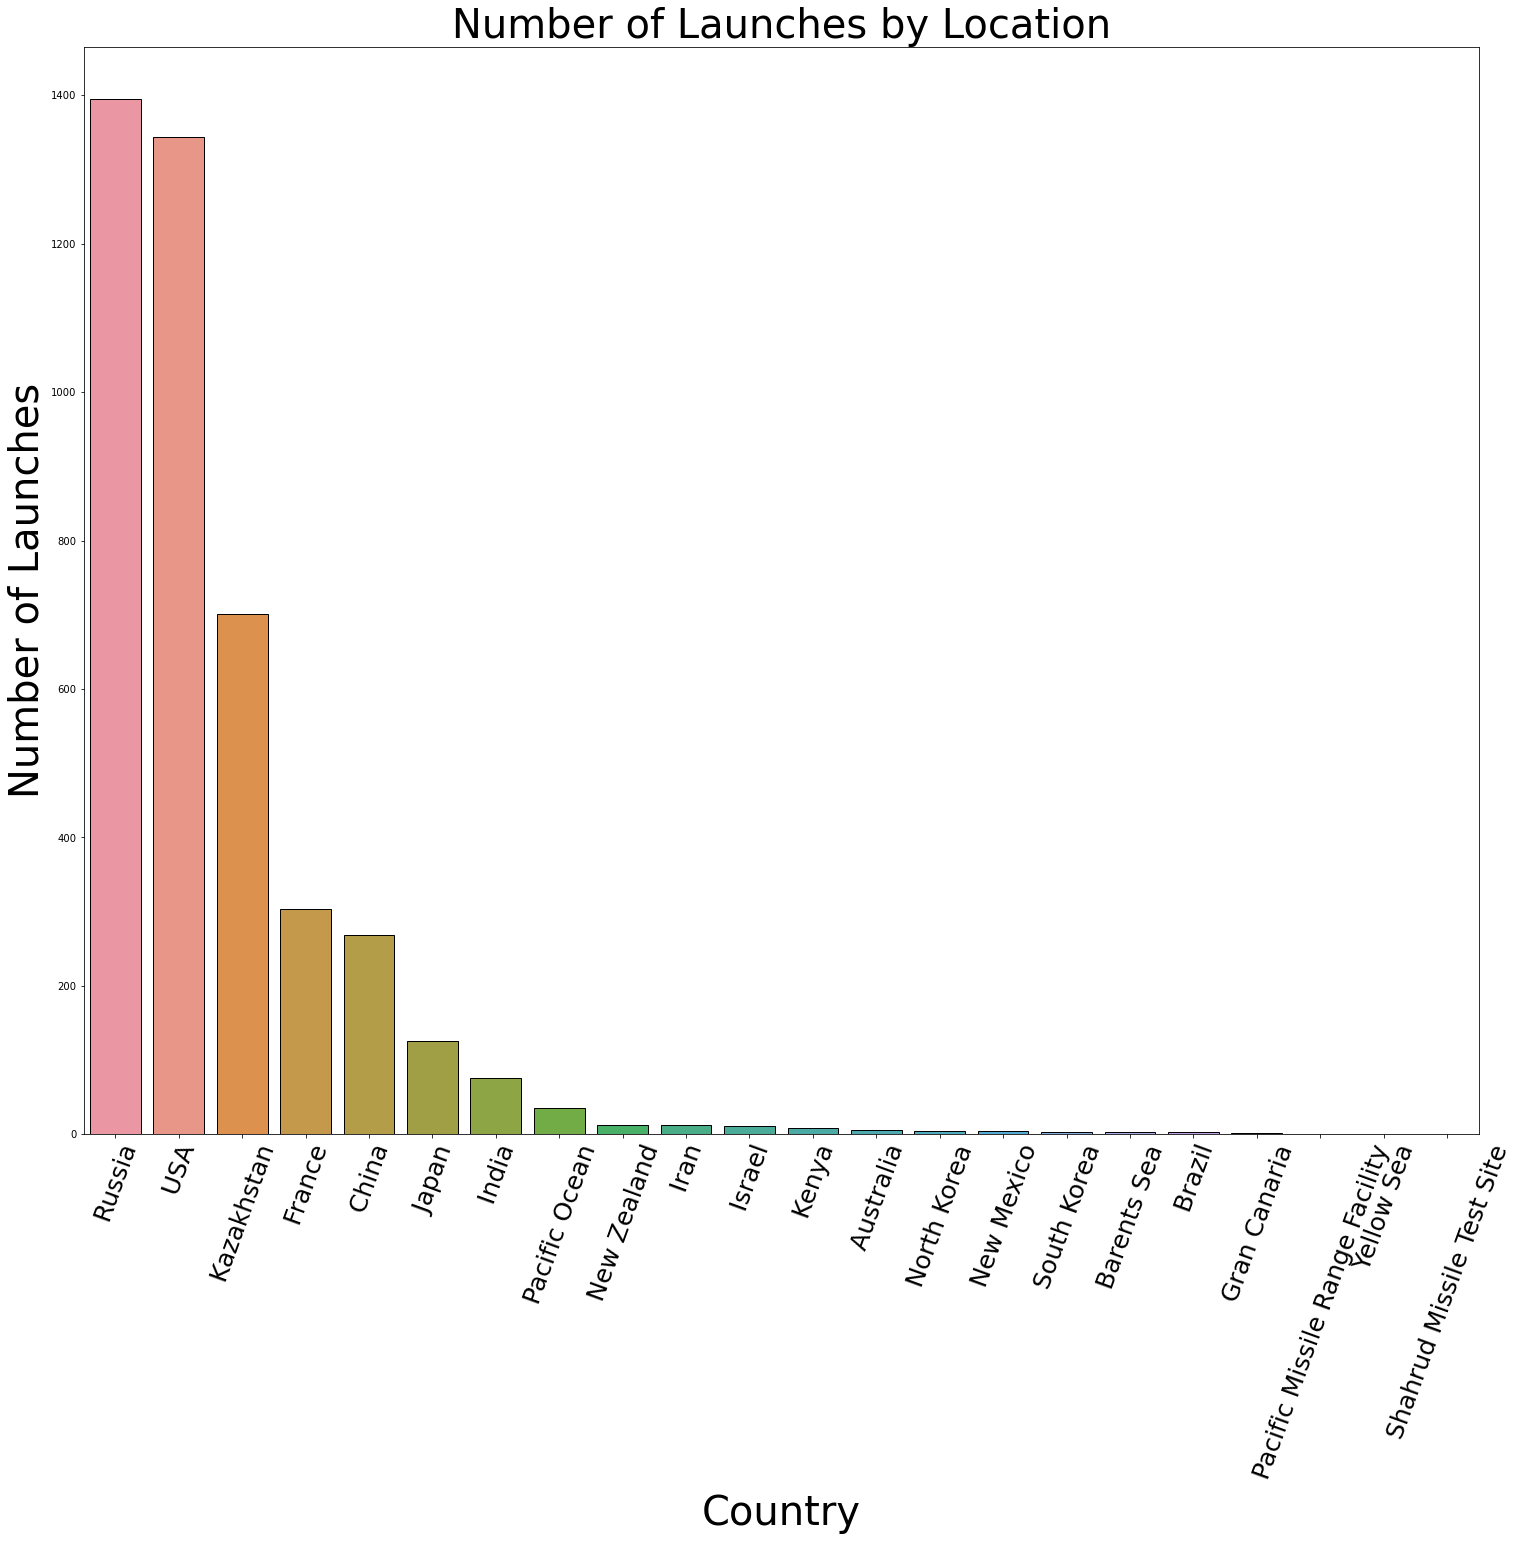

In [305]:
# Plot the number of launches by Country
plt.figure(figsize=(25,20))
sns.barplot(edgecolor='black', x=Country_counts.index, y=Country_counts.values)
plt.title("Number of Launches by Location", fontsize=40)
plt.xlabel("Country", fontsize=40)
plt.ylabel("Number of Launches", fontsize=40)
plt.xticks(rotation=70, fontsize=25)
plt.show()

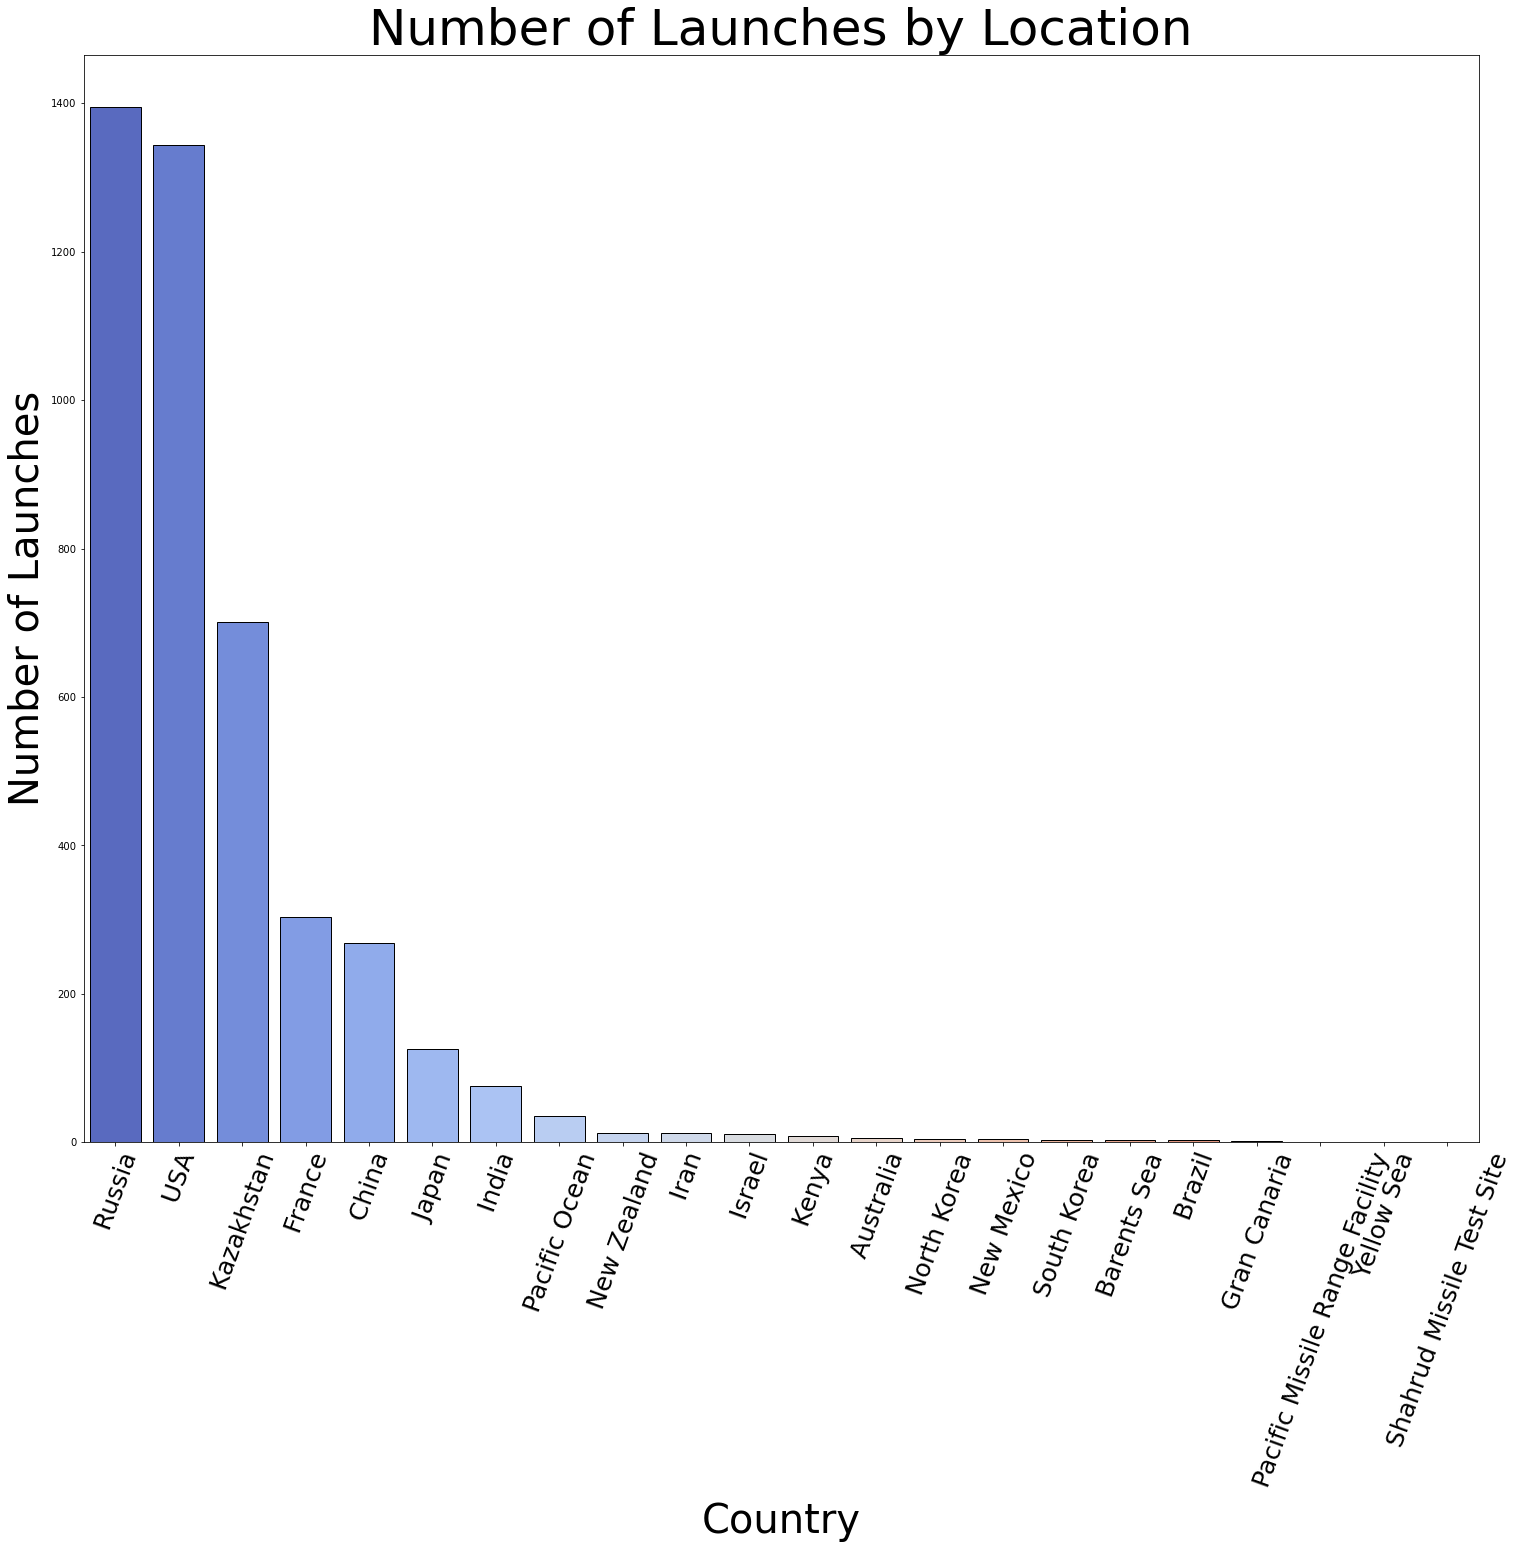

In [308]:
plt.figure(figsize=(25,20))
sns.barplot(edgecolor='black',x=Country_counts.index, y=Country_counts.values, palette='coolwarm')
plt.title("Number of Launches by Location",fontsize=50)
plt.xlabel("Country",fontsize=40)
plt.ylabel("Number of Launches",fontsize=40)
plt.xticks(rotation=70, fontsize=25)
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Success'),
  Text(1, 0, 'Failure'),
  Text(2, 0, 'Prelaunch Failure'),
  Text(3, 0, 'Partial Failure')])

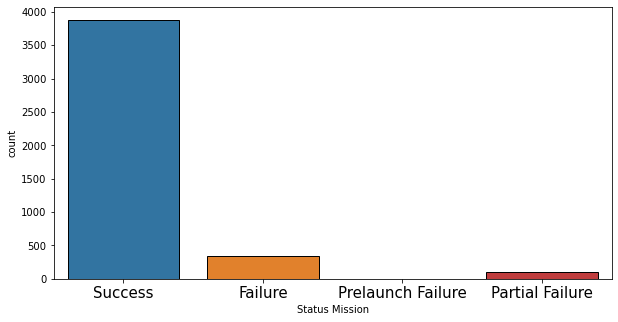

In [309]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,edgecolor='black', x = 'Status Mission')
plt.xticks(fontsize=15)

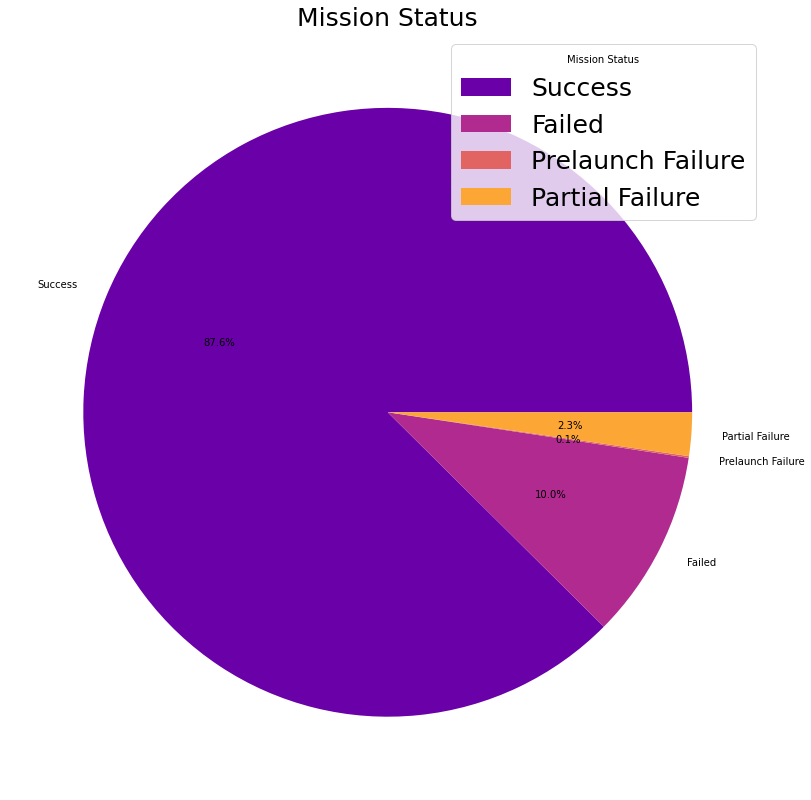

In [318]:
# Get the total number of launches
total_launches = 4324

# Get the percentage of successful launches
success_perc = round((df['Status Mission']=='Success').sum()/total_launches*100,10)

# Get the percentage of failed launches
failed_perc = round((df['Status Mission']!='Success').sum()/total_launches*100,10)

# Get the percentage of prelaunch failures
prelaunch_failure_perc = round((df['Status Mission']=='Prelaunch Failure').sum()/total_launches*100,10)

# Get the percentage of partial failures
partial_failure_perc = round((df['Status Mission']=='Partial Failure').sum()/total_launches*100,10)

# Plot the percentage of successful, failed, prelaunch failures, and partial failures
plt.figure(figsize=(15,14))
plt.title('Mission Status', fontsize=25)
plt.pie([success_perc, failed_perc, prelaunch_failure_perc, partial_failure_perc], labels=['Success', 'Failed', 'Prelaunch Failure','Partial Failure'], autopct=lambda p : '{:.1f}%'.format(p),colors=sns.color_palette("plasma",4))
plt.legend(title='Mission Status',fontsize=25)
plt.show()


(array([0, 1]), [Text(0, 0, 'StatusActive'), Text(1, 0, 'StatusRetired')])

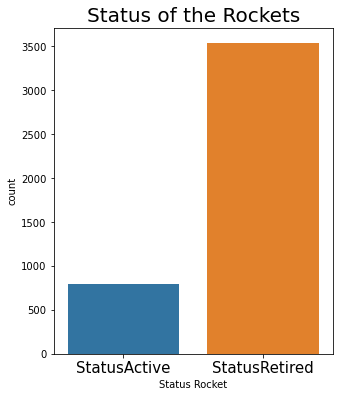

In [319]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = 'Status Rocket')
plt.title('Status of the Rockets', fontsize=20)
plt.xticks(fontsize=15)

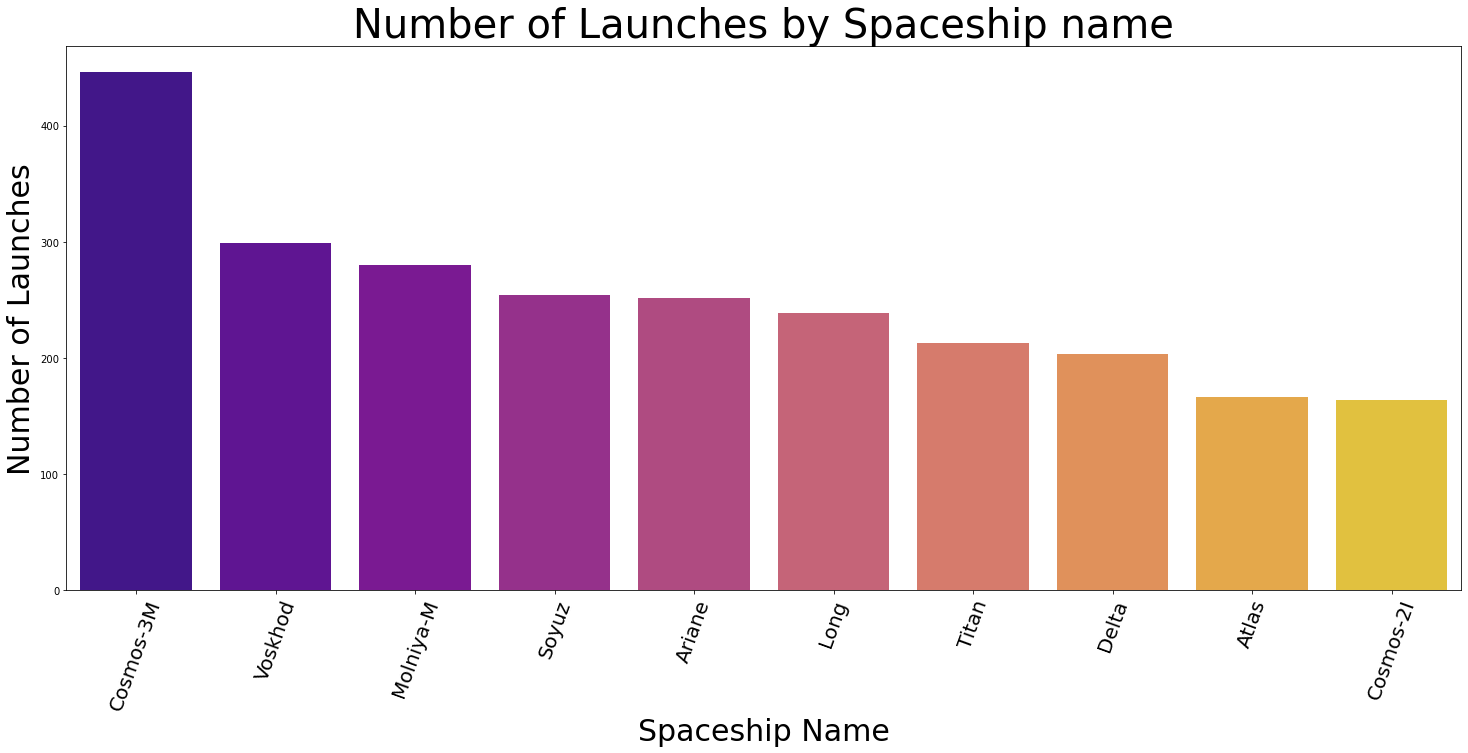

In [320]:
plt.figure(figsize=(25,10))
sns.countplot(x='Spaceship_name', data=df,order = df['Spaceship_name'].value_counts().nlargest(10).index,palette='plasma')
plt.title("Number of Launches by Spaceship name", fontsize=40)
plt.xlabel("Spaceship Name", fontsize=30)
plt.ylabel("Number of Launches",fontsize=30)
plt.xticks(rotation=70, fontsize=20)
plt.show()

In [321]:
df_nasa=df[df['Company Name']=='NASA']
df_arianespace=df[df['Company Name']=='Arianespace']
df_ula=df[df['Company Name']=='ULA']
df_spacex=df[df['Company Name']=='SpaceX']

Text(0.5, 1.0, 'SpaceX success rate = 47.0%')

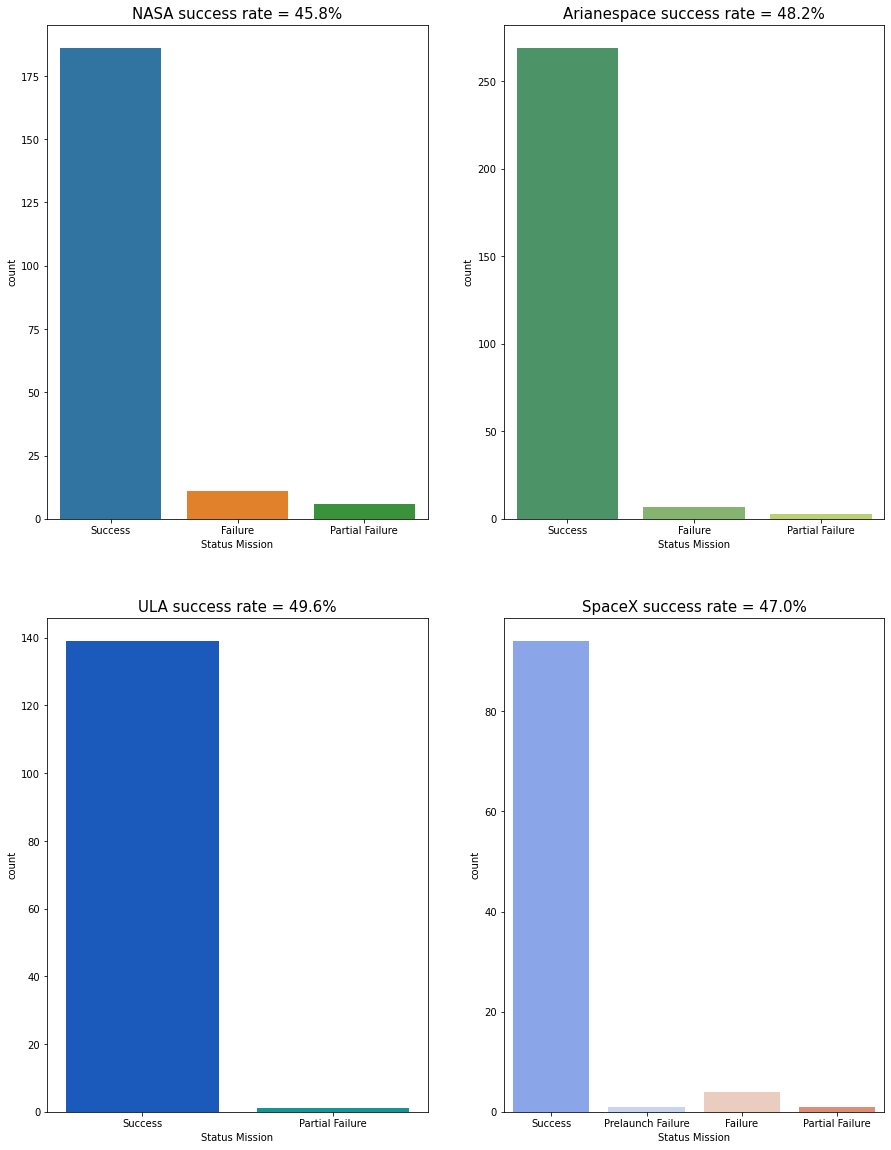

In [323]:
#From the above plots, we see that Roscosmos has the highest success rate.
#However, number of missions undertaken by NASA are far higher and the success rate is nearly identical as Roscosmos.
#Hence, NASA fairs far better than the other companies in the success rate of mission.
import warnings
warnings.simplefilter('ignore')
fig1=plt.figure(figsize=(15,20))
ax1=fig1.add_subplot(221)
sns.countplot('Status Mission',data=df_nasa,ax=ax1)
ax1.set_title('NASA success rate = {0:.1f}%'.format(50*df_nasa['Status Mission'].value_counts()[0]/df_nasa.shape[0]),size=15)

ax2=fig1.add_subplot(222)
sns.countplot('Status Mission',data=df_arianespace,ax=ax2,palette='summer')
ax2.set_title('Arianespace success rate = {0:.1f}%'.format(50*df_arianespace['Status Mission'].value_counts()[0]/df_arianespace.shape[0]),size=15)


ax3=fig1.add_subplot(223)
sns.countplot('Status Mission',data=df_ula,ax=ax3,palette='winter')
ax3.set_title('ULA success rate = {0:.1f}%'.format(50*df_ula['Status Mission'].value_counts()[0]/df_ula.shape[0]),size=15)


ax4=fig1.add_subplot(224)
sns.countplot('Status Mission',data=df_spacex,ax=ax4,palette='coolwarm')
ax4.set_title('SpaceX success rate = {0:.1f}%'.format(50*df_spacex['Status Mission'].value_counts()[0]/df_spacex.shape[0]),size=15)

In [324]:
#df.to_excel('Locations.xlsx', index = True)

In [327]:
country_counts = dict(df['Country'].value_counts())
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Country Name</b>', '<b>Number of Space Missions</b>'],
                line_color='black',
                fill_color='lightblue',
                align='left',
                font=dict(color='black', size=14)),
    cells=dict(values=[list(country_counts.keys()),
                      list(country_counts.values())],
               line_color='black',
               fill_color='white',
               align='left',
               font=dict(color='black', size=13)))
])

fig.update_layout(width=500, height=450,margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Number of Space Missions Per Launch Location</b>', 'x' : 0.95},
                 font_family = 'Fira Code',title_font_color= '#34C0FD')
fig.show()

NameError: name 'go' is not defined

# 5.Prediction Model

In [328]:
df

,Company Name,Location,Status Rocket,Status Mission,Launch date,Spaceship_name,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",StatusActive,Success,2020-08-07,Falcon,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,Success,2020-08-06,Long,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas",StatusActive,Success,2020-08-04,Starship,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",StatusActive,Success,2020-07-30,Proton-M/Briz-M,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",StatusActive,Success,2020-07-30,Atlas,2020,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",StatusRetired,Failure,1958-02-05,Vanguard,1958,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",StatusRetired,Success,1958-02-01,Juno,1958,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",StatusRetired,Failure,1957-12-06,Vanguard,1957,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",StatusRetired,Success,1957-11-03,Sputnik,1957,Kazakhstan


In [329]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [330]:
X = df[['Country']]
y = df['Status Mission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
knn = KNeighborsClassifier(n_neighbors=5)

In [332]:
knn.fit(X_train, y_train)

ValueError: could not convert string to float: ' Russia'

In [333]:
y_pred = knn.predict(X_test)

ValueError: could not convert string to float: ' USA'

In [334]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN model:', accuracy)

Accuracy of KNN model: 0.9017341040462428


In [335]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN model:', accuracy)

Accuracy of KNN model: 0.900578034682081


In [336]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

          Failure       0.50      0.01      0.03        67
  Partial Failure       1.00      0.05      0.10        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95       778

         accuracy                           0.90       865
        macro avg       0.60      0.27      0.27       865
     weighted avg       0.87      0.90      0.86       865



In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ["Failure","Partial Failure", "Prelaunch Failure", "Success"])) # if 'Status Mission' has two classes only.

                   precision    recall  f1-score   support

          Failure       0.50      0.01      0.03        67
  Partial Failure       1.00      0.05      0.10        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95       778

         accuracy                           0.90       865
        macro avg       0.60      0.27      0.27       865
     weighted avg       0.87      0.90      0.86       865



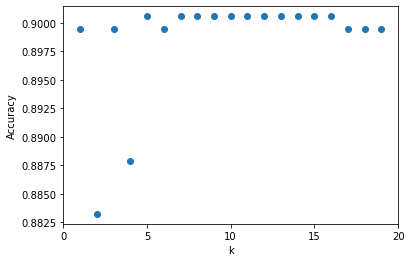

In [288]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a plot of the KNN model's accuracy for different values of k
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

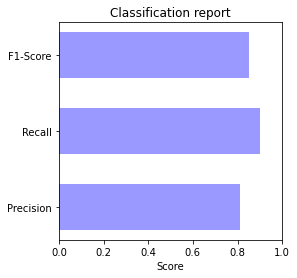

In [289]:
#Generate classification report
cr = classification_report(y_test, y_pred, output_dict=True)

#Extract precision, recall, and f1-score values
precision = cr["weighted avg"]["precision"]
recall = cr["weighted avg"]["recall"]
f1 = cr["weighted avg"]["f1-score"]

#Create a plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_title("Classification report")
ax.barh(np.arange(3), [precision, recall, f1],
height=0.6, color='blue', alpha=0.4)
ax.set_yticks(np.arange(3))
ax.set_yticklabels(['Precision', 'Recall', 'F1-Score'])
ax.set_xlabel('Score')
ax.set_xlim([0, 1])
plt.show()

In [339]:
#Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier

#Initialize the model
clf = DecisionTreeClassifier()

In [340]:
#Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [341]:
#Make predictions on the test set
y_pred = clf.predict(X_test)

In [342]:
#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9017341040462428


In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ["Failure","Partial Failure", "Prelaunch Failure", "Success"])) # if 'Status Mission' has two classes only.

                   precision    recall  f1-score   support

          Failure       0.50      0.04      0.08        67
  Partial Failure       1.00      0.05      0.10        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95       778

         accuracy                           0.90       865
        macro avg       0.60      0.27      0.28       865
     weighted avg       0.87      0.90      0.86       865

